In [1]:
!pip install pycocotools

In [2]:
!pip install --upgrade scikit-image scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.2
    Uninstalling scikit-image-0.25.2:
      Successfully uninstalled scikit-image-0.25.2


In [3]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO

In [4]:
import os
from pycocotools.coco import COCO

dataDir = '/kaggle/input/aai-course/'
dataType = 'train2014' 
imageDir = '{}/{}/{}/'.format(dataDir, dataType, dataType)
annFile = '/kaggle/input/advanced-artificial-inteligence/annotations/instances_train2014.json'

coco = COCO(annFile)

loading annotations into memory...
Done (t=10.16s)
creating index...
index created!


In [5]:
ids = 1
cats = coco.loadCats(ids=ids)
print(cats)

print("\n📋 Multiple Categories:")
category_ids = [1, 2, 3, 4, 5]  # person, bicycle, car, motorcycle, airplane
categories = coco.loadCats(ids=category_ids)

for cat in categories:
    print(f"ID: {cat['id']}, Name: {cat['name']}, Supercategory: {cat['supercategory']}")

all_cat_ids = coco.getCatIds()
print(f"\n🔢 Total Categories: {len(all_cat_ids)}")
print(f"First 10 IDs: {all_cat_ids[:10]}")
print(f"Last 10 IDs: {all_cat_ids[-10:]}")

print("\n🏷️ Categories by Name:")
person_cat = coco.loadCats(coco.getCatIds(catNms=['person']))
car_cat = coco.loadCats(coco.getCatIds(catNms=['car']))
print(f"Person: {person_cat}")
print(f"Car: {car_cat}")

[{'supercategory': 'person', 'id': 1, 'name': 'person'}]

📋 Multiple Categories:
ID: 1, Name: person, Supercategory: person
ID: 2, Name: bicycle, Supercategory: vehicle
ID: 3, Name: car, Supercategory: vehicle
ID: 4, Name: motorcycle, Supercategory: vehicle
ID: 5, Name: airplane, Supercategory: vehicle

🔢 Total Categories: 80
First 10 IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Last 10 IDs: [80, 81, 82, 84, 85, 86, 87, 88, 89, 90]

🏷️ Categories by Name:
Person: [{'supercategory': 'person', 'id': 1, 'name': 'person'}]
Car: [{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}]


In [6]:
category_ids = coco.getCatIds()
num_categories = len(category_ids)
print('number of categories: ',num_categories)
for ids in category_ids:
    cats = coco.loadCats(ids=ids)
    print(cats)

number of categories:  80
[{'supercategory': 'person', 'id': 1, 'name': 'person'}]
[{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}]
[{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}]
[{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}]
[{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]
[{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}]
[{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}]
[{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}]
[{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}]
[{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}]
[{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}]
[{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}]
[{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}]
[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
[{'supercategory': 'animal', 'id': 16, 'name': 'bird'}]
[{'supercategory': 'animal', 'id': 17, 'name': 'cat'}]
[{'supercategory': 'animal',

{'license': 5, 'file_name': 'COCO_train2014_000000057870.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 16:28:13', 'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg', 'id': 57870}


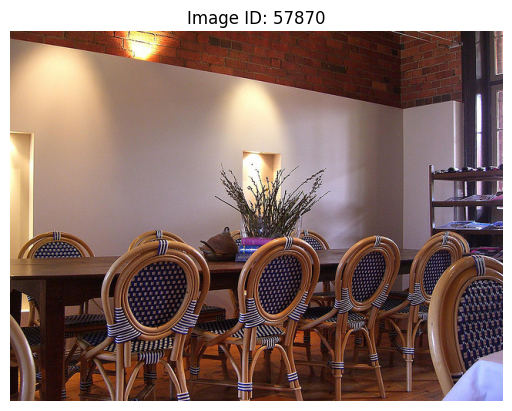

In [7]:
import cv2
import matplotlib.pyplot as plt

image_ids = coco.getImgIds()
image_id = image_ids[0] 
image_info = coco.loadImgs(image_id)[0] 
print(image_info)

image_path = f"/kaggle/input/aai-course/train2014/train2014/{image_info['file_name']}"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title(f"Image ID: {image_id}")
plt.axis('off')
plt.show()

In [8]:
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)
print(annotations)

[{'segmentation': [[233.29, 461.42, 235.35, 395.35, 240.52, 378.84, 245.68, 372.65, 250.84, 372.65, 283.87, 372.65, 294.19, 362.32, 298.32, 345.81, 301.42, 329.29, 303.48, 308.65, 311.74, 290.06, 330.32, 278.71, 348.9, 272.52, 363.35, 270.45, 388.13, 274.58, 401.55, 291.1, 403.61, 318.97, 395.35, 341.68, 388.13, 361.29, 378.84, 380.9, 373.68, 393.29, 366.45, 407.74, 365.42, 429.42, 366.45, 451.1, 376.77, 468.65, 377.81, 469.68, 361.29, 469.68, 353.03, 469.68, 317.94, 461.42, 313.81, 471.74, 299.35, 472.77, 297.29, 463.48, 244.65, 457.29, 243.61, 472.77, 238.45, 473.81, 237.42, 473.81]], 'area': 21635.5728, 'iscrowd': 0, 'image_id': 57870, 'bbox': [233.29, 270.45, 170.32, 203.36], 'category_id': 62, 'id': 102924}, {'segmentation': [[4.41, 338.69, 27.0, 342.08, 38.29, 361.28, 41.68, 378.22, 39.42, 480.0, 75.56, 479.87, 73.31, 357.89, 87.99, 359.02, 104.93, 348.85, 117.35, 346.6, 137.68, 293.51, 141.07, 289.0, 3.28, 299.16, 1.02, 339.82], [257.4, 337.56, 293.54, 336.43, 312.74, 286.74, 27

In [9]:
filterClasses = ['laptop', 'tv', 'cell phone']
catIds = coco.getCatIds(catNms=filterClasses)
print(catIds)

[72, 73, 77]


In [10]:
catID = 15
print(coco.loadCats(ids=catID))

imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
204800


In [11]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[9768, 16319, 578571]


In [12]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(f"Found {len(ann_ids)} annotations: {ann_ids}")

# Load the actual annotations
anns = coco.loadAnns(ann_ids)
print("\nObject Details:")
for i, ann in enumerate(anns):
    cat_name = coco.loadCats(ann['category_id'])[0]['name']
    print(f"  {i+1}. {cat_name} (Category ID: {ann['category_id']})")
    print(f"     Bbox: {ann['bbox']}")
    print(f"     Area: {ann['area']:.2f}")

Found 3 annotations: [9768, 16319, 578571]

Object Details:
  1. dog (Category ID: 18)
     Bbox: [50.67, 432.64, 261.41, 207.33]
     Area: 30316.59
  2. dog (Category ID: 18)
     Bbox: [229.85, 87.05, 200.95, 320.69]
     Area: 38554.01
  3. bench (Category ID: 15)
     Bbox: [0.0, 115.06, 480.0, 332.22]
     Area: 98204.73


Image dimensions: 640x480
Annotation 1 mask shape: (640, 480)
Annotation 2 mask shape: (640, 480)
Annotation 3 mask shape: (640, 480)
Final mask shape: (640, 480)


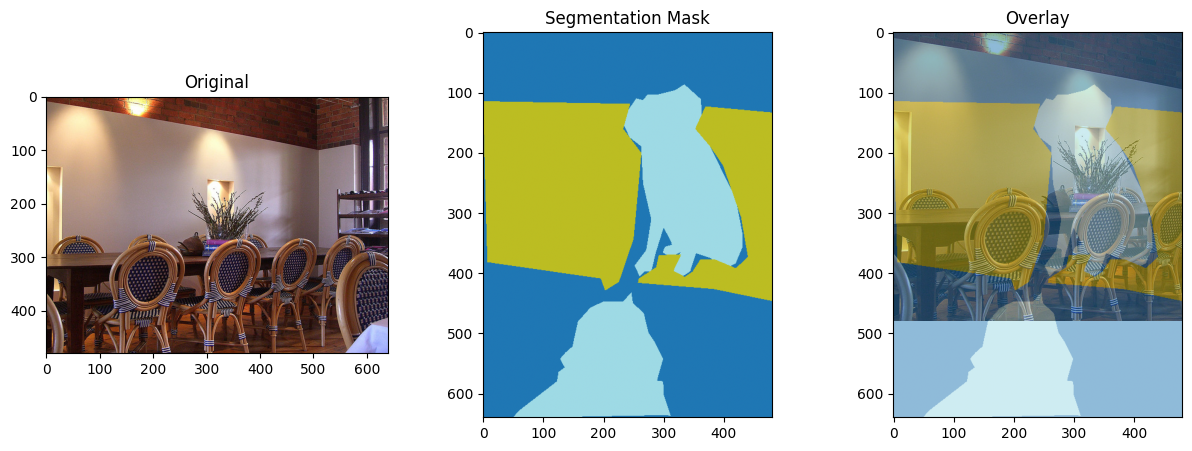

In [13]:
img_info = coco.loadImgs(imgId)[0]
height, width = img_info['height'], img_info['width']
print(f"Image dimensions: {height}x{width}")

mask = np.zeros((height, width), dtype=np.uint8)

for i, ann in enumerate(anns):
    m = coco.annToMask(ann)
    print(f"Annotation {i+1} mask shape: {m.shape}")
    mask[m > 0] = ann['category_id']

print(f"Final mask shape: {mask.shape}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1, 3, 2)  
plt.imshow(mask, cmap='tab20')
plt.title("Segmentation Mask")

plt.subplot(1, 3, 3)
plt.imshow(image)
plt.imshow(mask, alpha=0.5, cmap='tab20')
plt.title("Overlay")

plt.show()

In [14]:
print(f"imageDir value: {imageDir}")
print(f"image_path: {image_path}")
print(f"Combined: {imageDir + image_path}")

imageDir value: /kaggle/input/aai-course//train2014/train2014/
image_path: /kaggle/input/aai-course/train2014/train2014/COCO_train2014_000000057870.jpg
Combined: /kaggle/input/aai-course//train2014/train2014//kaggle/input/aai-course/train2014/train2014/COCO_train2014_000000057870.jpg


image_path value: /kaggle/input/aai-course/train2014/train2014/COCO_train2014_000000057870.jpg
imageDir value: /kaggle/input/aai-course//train2014/train2014/
image_path already has full path!


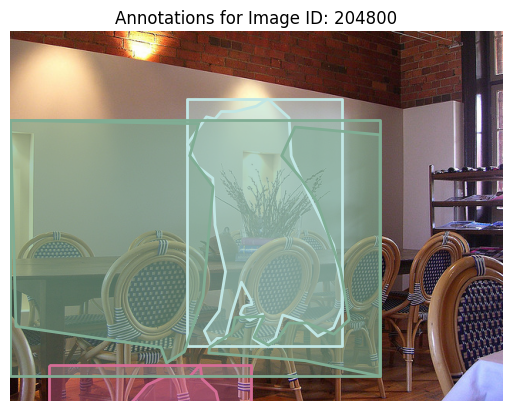

In [15]:
print(f"image_path value: {image_path}")
print(f"imageDir value: {imageDir}")

if image_path.startswith('/kaggle/input/'):
    print("image_path already has full path!")
    image = plt.imread(image_path)
else:
    print("image_path is just filename")
    image = plt.imread(imageDir + image_path)

plt.imshow(image)
coco.showAnns(anns, draw_bbox=True)
plt.axis('off')
plt.title(f'Annotations for Image ID: {imgId}')
plt.show()

Annotations for Image ID 204800:
COCO_train2014_000000204800.jpg
Full path: /kaggle/input/aai-course/train2014/train2014/COCO_train2014_000000204800.jpg


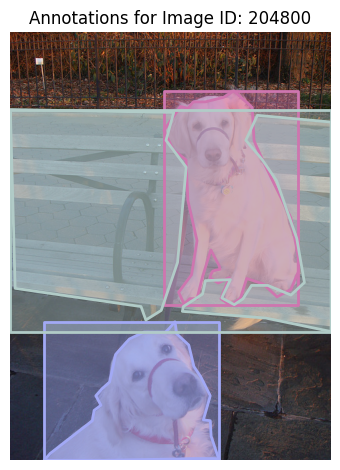


Found 3 annotations:
  1. dog (Category ID: 18)
  2. dog (Category ID: 18)
  3. bench (Category ID: 15)


In [16]:
image_dir = '/kaggle/input/aai-course/train2014/train2014'  

print(f"Annotations for Image ID {imgId}:")
anns = coco.loadAnns(ann_ids)

image_path = coco.loadImgs(imgId)[0]['file_name']
print(image_path)

full_image_path = image_dir + '/' + image_path
print(f"Full path: {full_image_path}")

image = plt.imread(full_image_path)
plt.imshow(image)

coco.showAnns(anns, draw_bbox=True)

plt.axis('off')
plt.title(f'Annotations for Image ID: {imgId}')
plt.tight_layout()
plt.show()

print(f"\nFound {len(anns)} annotations:")
for i, ann in enumerate(anns):
    cat_name = coco.loadCats(ann['category_id'])[0]['name']
    print(f"  {i+1}. {cat_name} (Category ID: {ann['category_id']})")

Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted

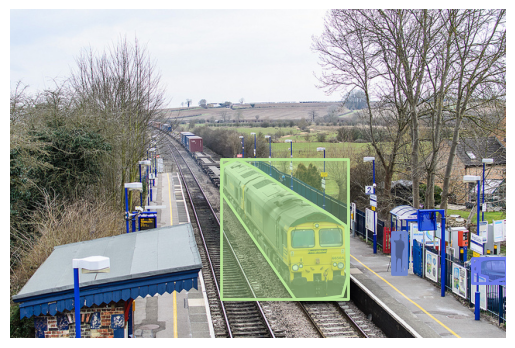

In [17]:
def main():

    cat_ids = coco.getCatIds()
    print(f"Number of Unique Categories: {len(cat_ids)}")
    print("Category IDs:")
    print(cat_ids) 

    cats = coco.loadCats(cat_ids)
    cat_names = [cat["name"] for cat in cats]
    print("Categories Names:")
    print(cat_names)

    query_id = cat_ids[0]
    query_annotation = coco.loadCats([query_id])[0]
    query_name = query_annotation["name"]
    query_supercategory = query_annotation["supercategory"]
    print("Category ID -> Category Name:")
    print(
        f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
    )

    query_name = cat_names[2]
    query_id = coco.getCatIds(catNms=[query_name])[0]
    print("Category Name -> ID:")
    print(f"Category Name: {query_name}, Category ID: {query_id}")

    img_ids = coco.getImgIds(catIds=[query_id])
    print(f"Number of Images Containing {query_name}: {len(img_ids)}")

    img_id = img_ids[2]
    img_info = coco.loadImgs([img_id])[0]
    img_file_name = img_info["file_name"]
    img_url = img_info["coco_url"]
    print(
        f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
    )

    ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    print(f"Annotations for Image ID {img_id}:")
    print(anns)

    im = plt.imread(imageDir+ coco.loadImgs(img_id)[0]['file_name'])
    plt.axis("off")
    plt.imshow(np.asarray(im))
    plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
    coco.showAnns(anns, draw_bbox=True)
    plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)
    plt.show()
    return


if __name__ == "__main__":

    main()

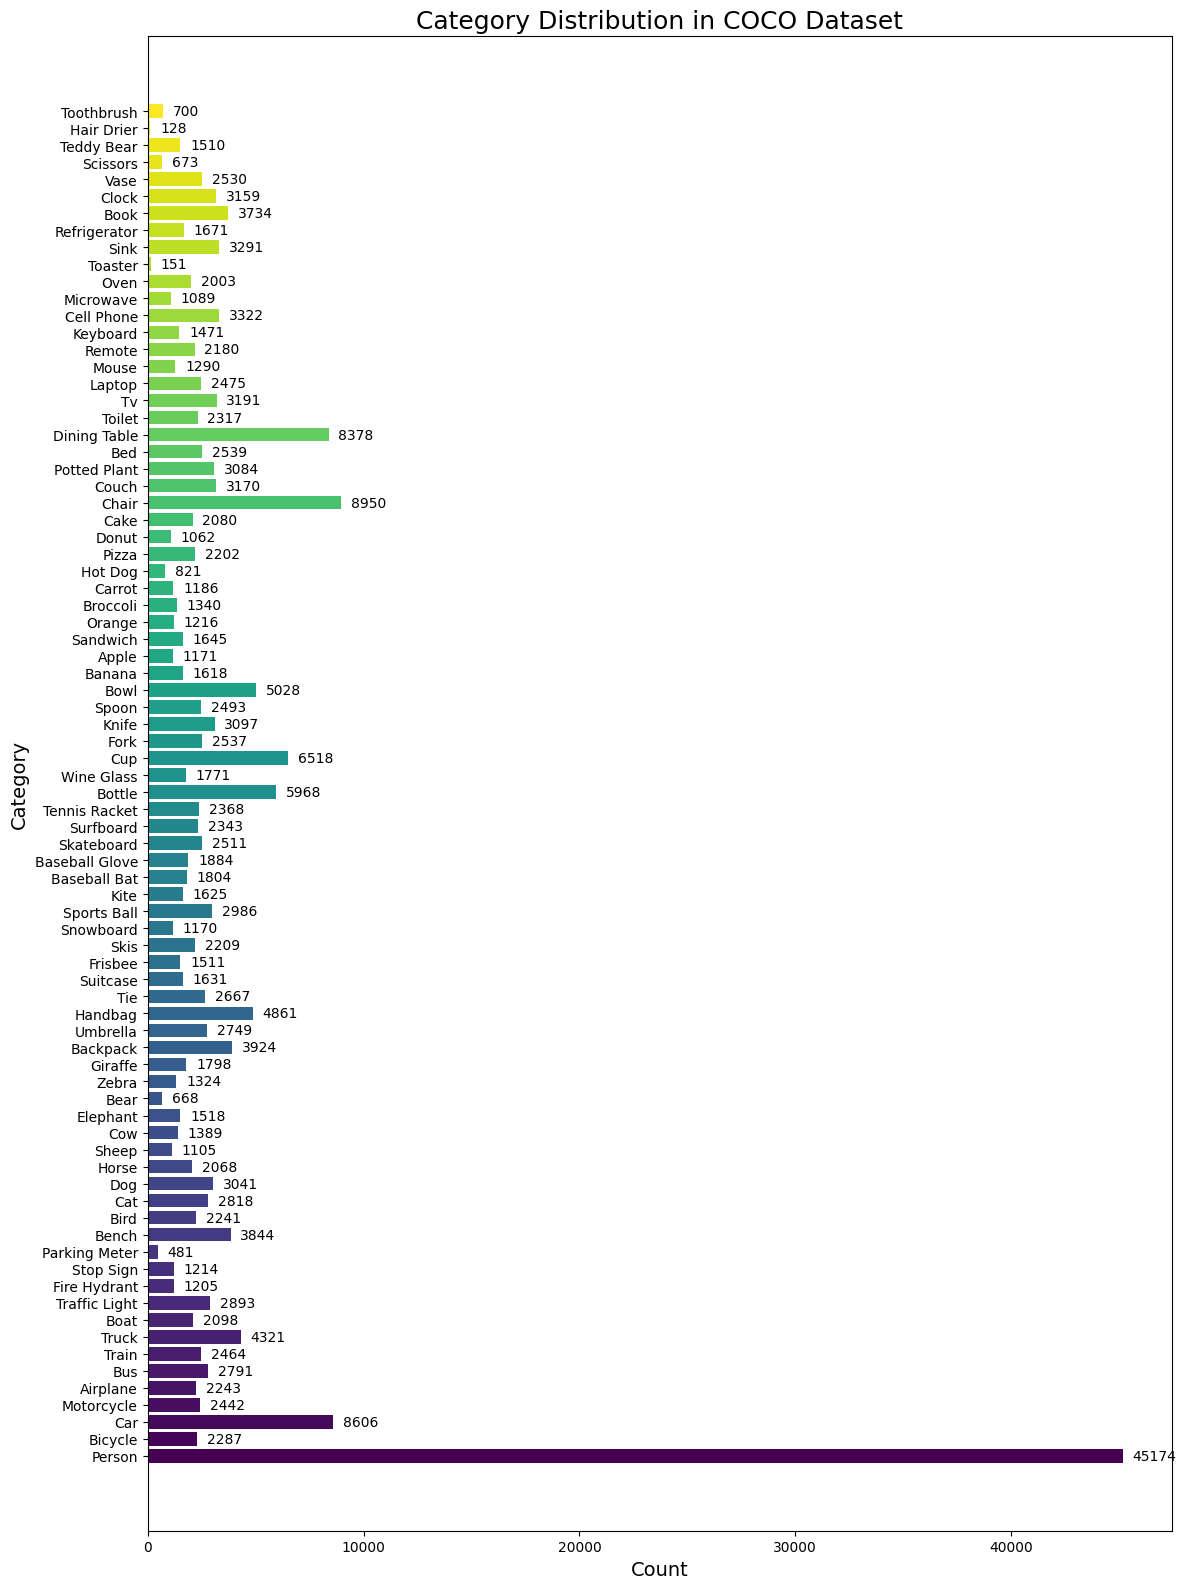

In [18]:
import matplotlib.pyplot as plt
import numpy as np

catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)
category_names = [cat['name'].title() for cat in cats]
category_counts = [len(coco.getImgIds(catIds=[cat['id']])) for cat in cats]

plt.figure(figsize=(12, 16))
colors = plt.cm.viridis(np.linspace(0, 1, len(category_names)))
bars = plt.barh(category_names, category_counts, color=colors)

for i, (bar, count) in enumerate(zip(bars, category_counts)):
    plt.text(count + max(category_counts)*0.01, i, str(count), va='center')

plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.title('Category Distribution in COCO Dataset', fontsize=18)
plt.tight_layout()
plt.savefig('coco-cats.png', dpi=300)
plt.show()

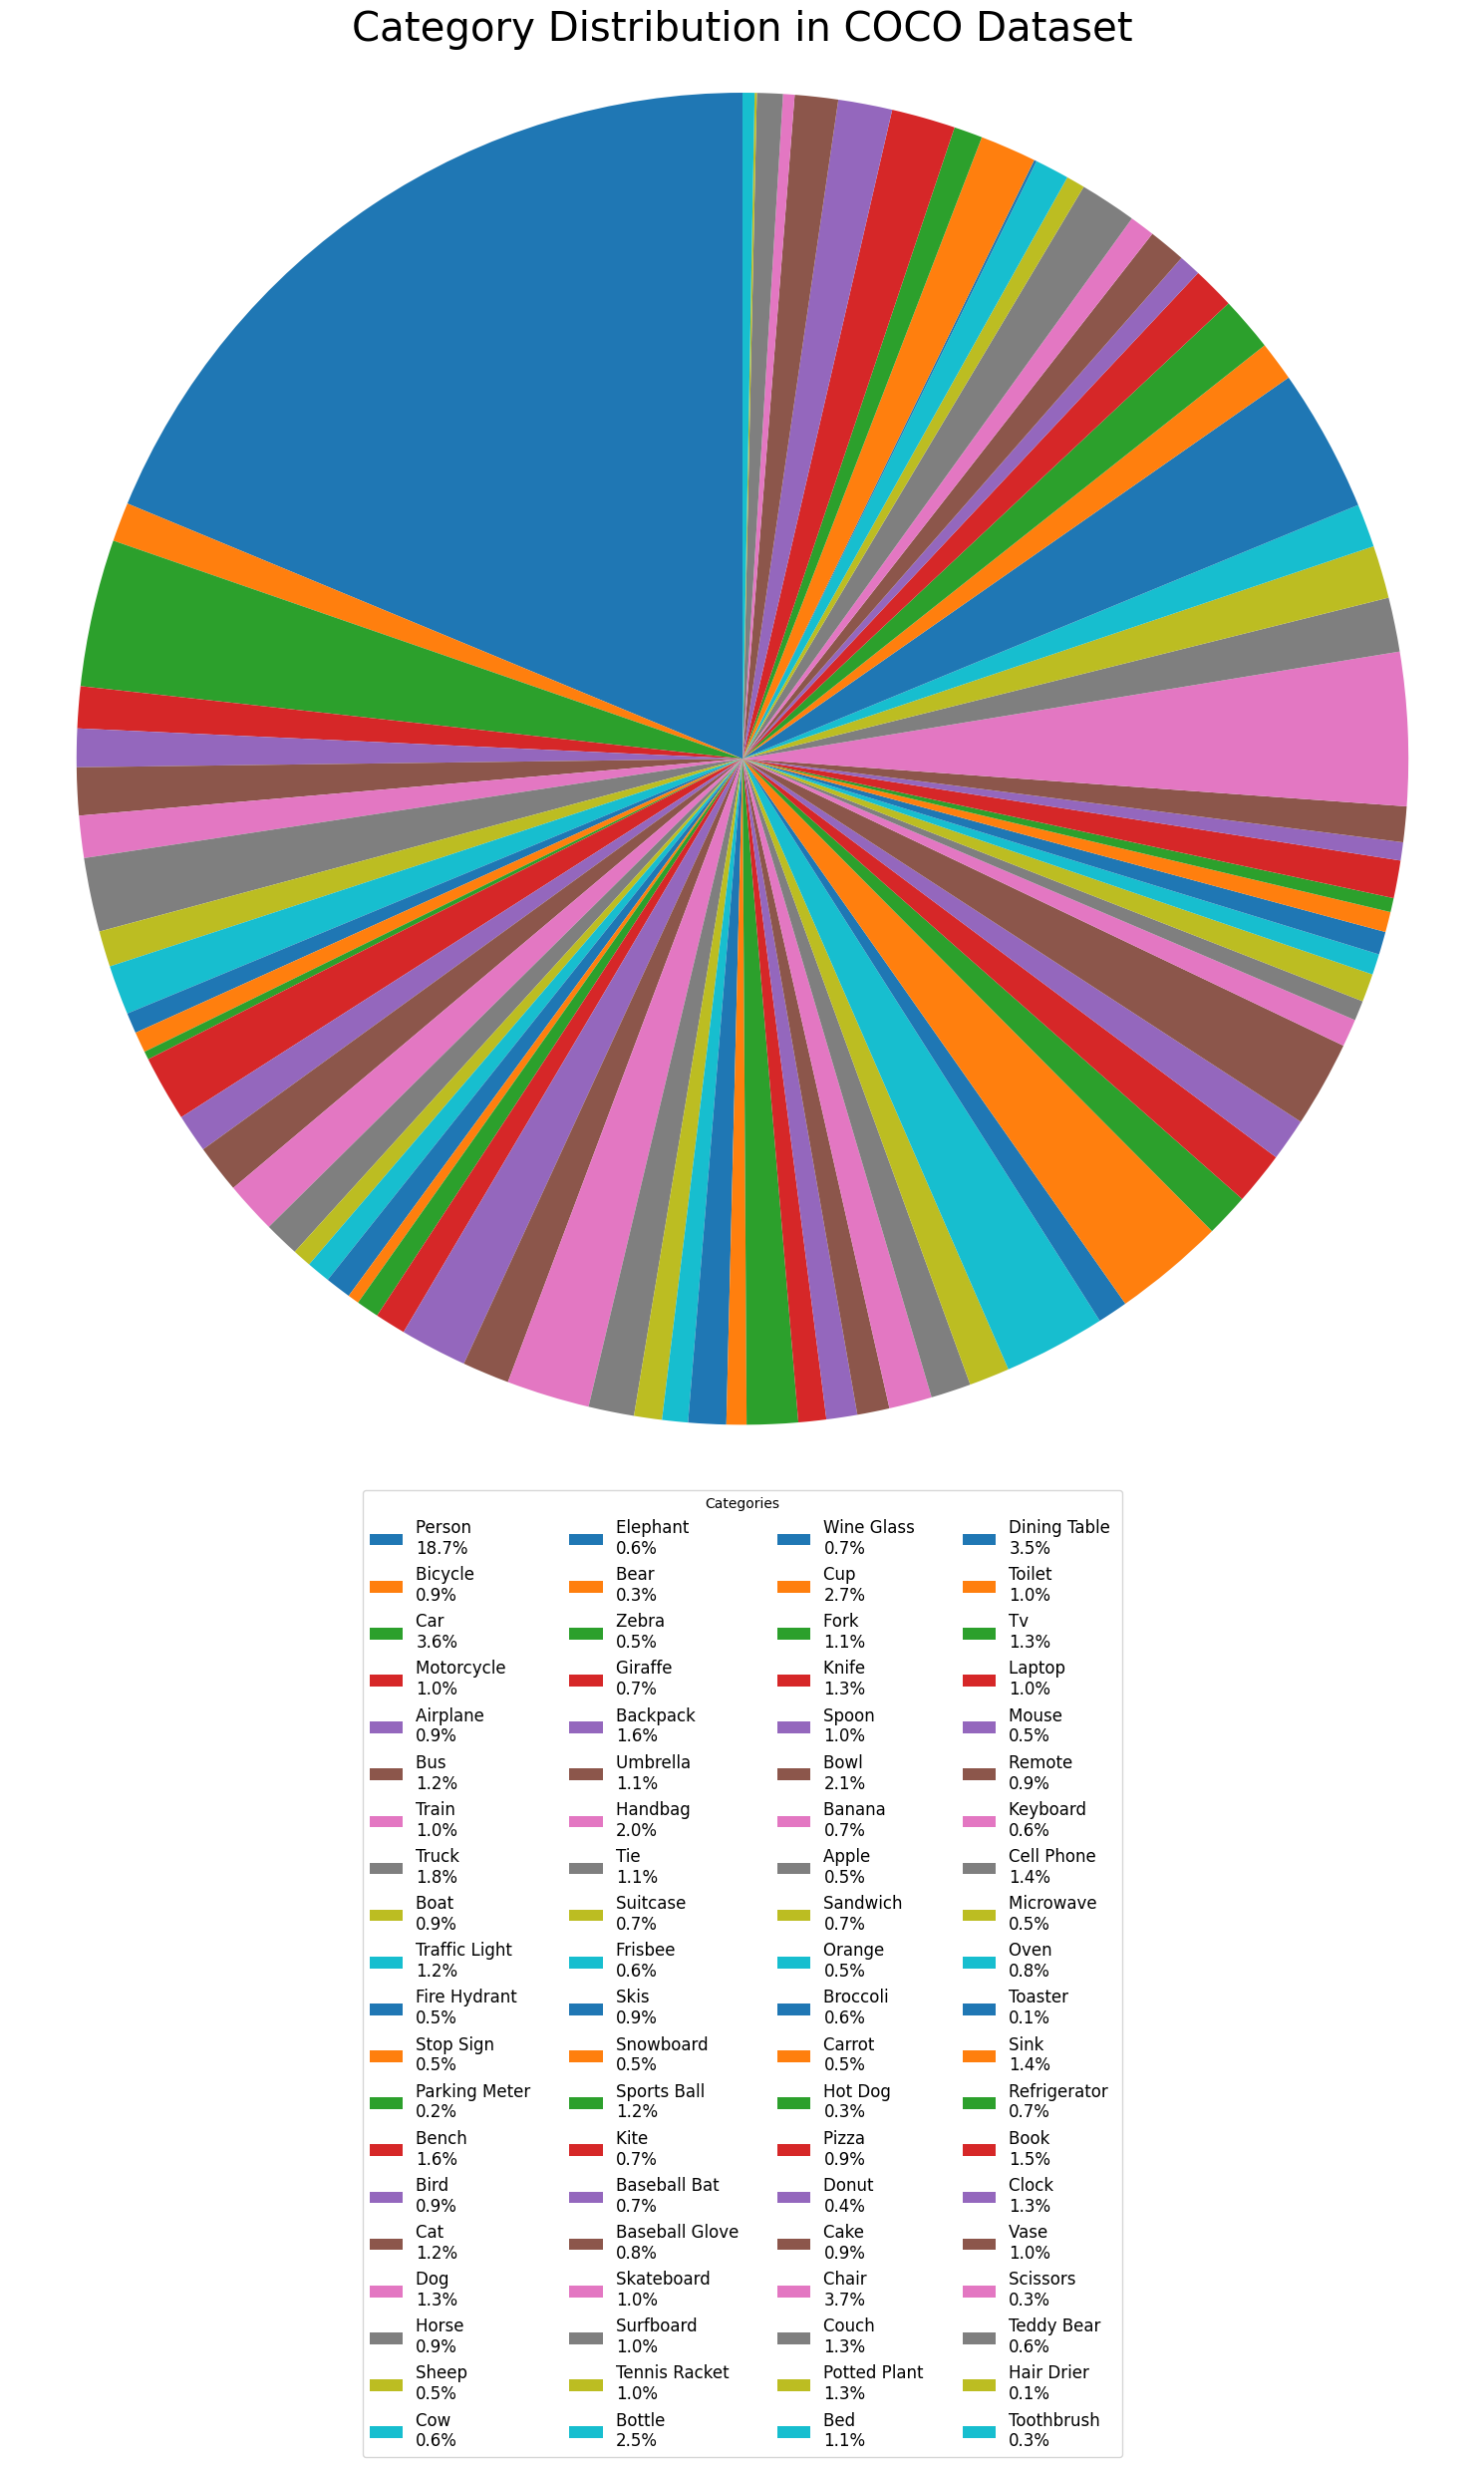

In [19]:
total_count = sum(category_counts)
category_percentages = [(count / total_count) * 100 for count in category_counts]


plt.figure(figsize=(15, 24.9))


labels = [f"{name} " for name, percentage in zip(category_names, category_percentages)]
label_props = {"fontsize": 25, 
               "bbox": {"edgecolor": "white", 
                        "facecolor": "white", 
                        "alpha": 0.7, 
                        "pad": 0.5}
              }

wedges, _, autotexts = plt.pie(category_counts, 
                              autopct='', 
                              startangle=90, 
                              textprops=label_props, 
                              pctdistance=0.85)

legend_labels = [f"{label}\n{category_percentages[i]:.1f}%" for i, label in enumerate(labels)]
plt.legend(wedges, legend_labels, title="Categories", loc="upper center", bbox_to_anchor=(0.5, -0.01), 
           ncol=4, fontsize=12)

plt.axis('equal')
plt.title('Category Distribution in COCO Dataset', fontsize=29)
plt.tight_layout()
plt.savefig('coco-dis.png', dpi=300)
plt.show()

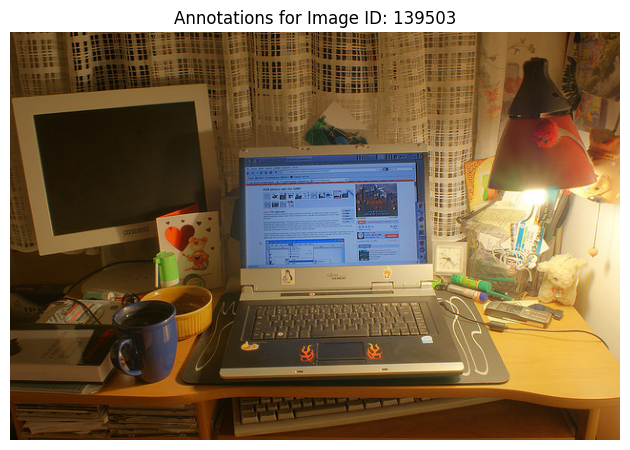

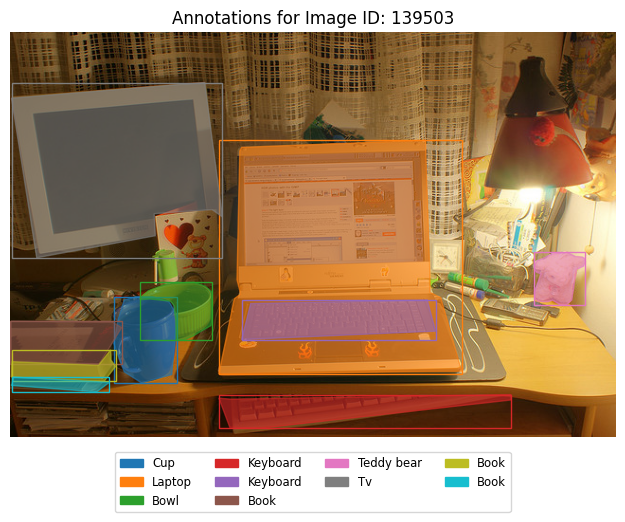

In [20]:
filterClasses = ['laptop', 'tv', 'cell phone']

catIds = coco.getCatIds(catNms=filterClasses)

imgIds = coco.getImgIds(catIds=catIds)

if len(imgIds) > 0:
    image_id = imgIds[np.random.randint(len(imgIds))]  # Select a random image ID
    image_info = coco.loadImgs(image_id)

    if image_info is not None and len(image_info) > 0:
        image_info = image_info[0]
        image_path = imageDir + image_info['file_name']

        annotation_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotation_ids)

        category_names = [coco.loadCats(ann['category_id'])[0]['name'].capitalize() for ann in annotations]
        category_colors = list(matplotlib.colors.TABLEAU_COLORS.values())

        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('Img.png',dpi=350)
        plt.show()
        
        plt.imshow(image)
        plt.axis('off')

        for ann, color in zip(annotations, category_colors):
            bbox = ann['bbox']
            segmentation = ann['segmentation']

            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,
                                     edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)

            for seg in segmentation:
                poly = np.array(seg).reshape((len(seg) // 2, 2))
                plt.fill(poly[:, 0], poly[:, 1], color=color, alpha=0.6)

        legend_patches = [patches.Patch(color=color, label=name) for color, name in zip(category_colors, category_names)]
        plt.legend(handles=legend_patches, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.2), fontsize='small')

        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        plt.savefig('annImg.png',dpi=350)
        plt.show()
    else:
        print("No image information found for the selected image ID.")
else:
    print("No images found for the desired classes.")

In [21]:
image_ids = coco.getImgIds()
image_id = image_ids[0] 
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))

print(f"Image ID: {image_id}")
print(f"Number of annotations: {len(annotations)}")

for i, ann in enumerate(annotations):
    cat_name = coco.loadCats(ann['category_id'])[0]['name']
    print(f"  {i+1}. {cat_name} (ID: {ann['category_id']})")

Image ID: 57870
Number of annotations: 17
  1. chair (ID: 62)
  2. dining table (ID: 67)
  3. chair (ID: 62)
  4. chair (ID: 62)
  5. chair (ID: 62)
  6. chair (ID: 62)
  7. chair (ID: 62)
  8. chair (ID: 62)
  9. chair (ID: 62)
  10. vase (ID: 86)
  11. chair (ID: 62)
  12. chair (ID: 62)
  13. potted plant (ID: 64)
  14. dining table (ID: 67)
  15. book (ID: 84)
  16. book (ID: 84)
  17. chair (ID: 62)


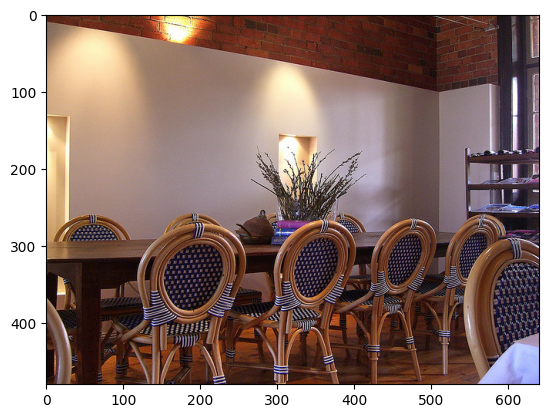

In [22]:
image_info = coco.loadImgs(image_id)[0]

image_dir = '/kaggle/input/aai-course/train2014/train2014/'
image_path = os.path.join(image_dir, image_info['file_name'])

main_image = plt.imread(image_path)
plt.imshow(main_image)
plt.show()

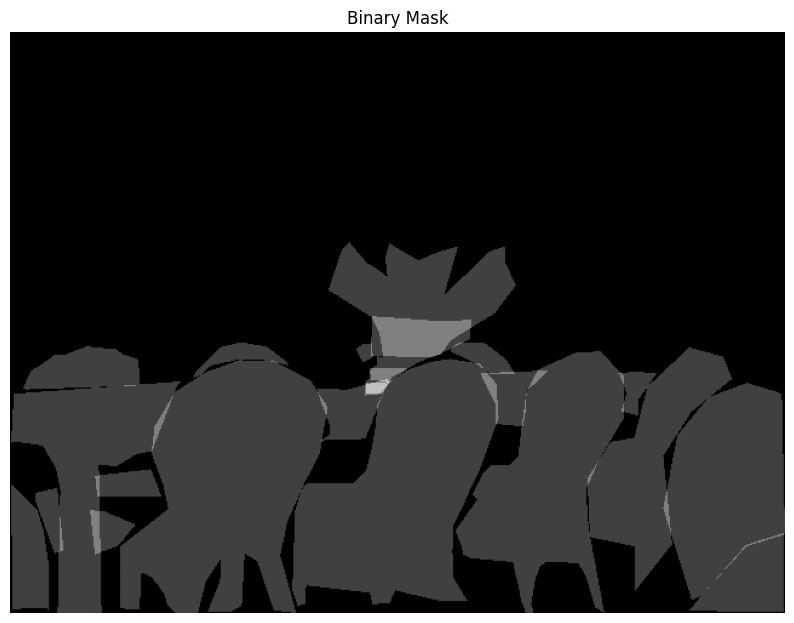

In [23]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty binary mask with the same dimensions as the image
binary_mask = np.zeros((height, width), dtype=np.uint8)

# Iterate through the annotations and draw the binary masks
for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)

    # Add the mask to the binary mask
    binary_mask += mask

# Display the binary mask
plt.figure(figsize=(10,10))
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')
plt.title('Binary Mask')
plt.savefig('binary_mask.png', dpi=300)
plt.show()

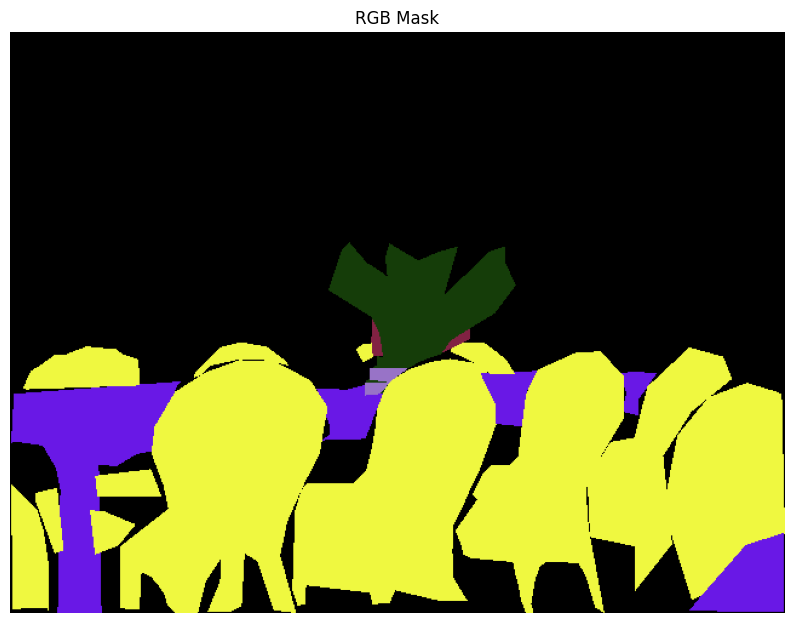

In [24]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)

color_map = {cat['id']: (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
             for cat in coco.loadCats(catIDs)}

for annotation in annotations:
    category_id = annotation['category_id']
    color = color_map[category_id]

    mask = coco.annToMask(annotation)
    rgb_mask[mask == 1] = color

plt.figure(figsize=(10,10))
plt.imshow(rgb_mask)
plt.axis('off')
plt.title('RGB Mask')
plt.savefig('rgb_mask.png', dpi=300)
plt.show()

# Generating Instance Segmentation Mask

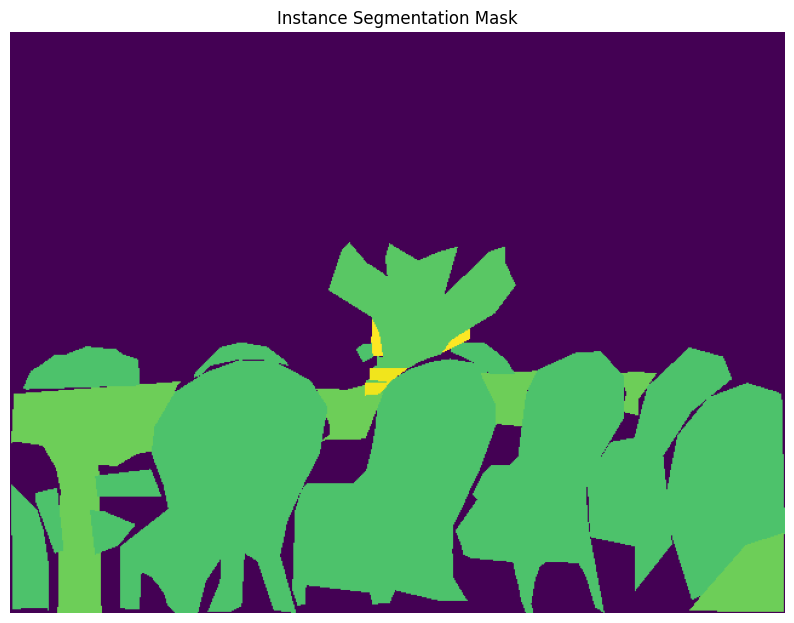

In [25]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

instance_mask = np.zeros((height, width), dtype=np.uint8)

for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)
    category_id = annotation['category_id']

    instance_mask[mask == 1] = category_id

plt.figure(figsize=(10,10))
plt.imshow(instance_mask, cmap='viridis')
plt.axis('off')
plt.title('Instance Segmentation Mask')
plt.savefig('instance_mask.png', dpi=300)
plt.show()

# Generating Object Detection Bounding Boxes

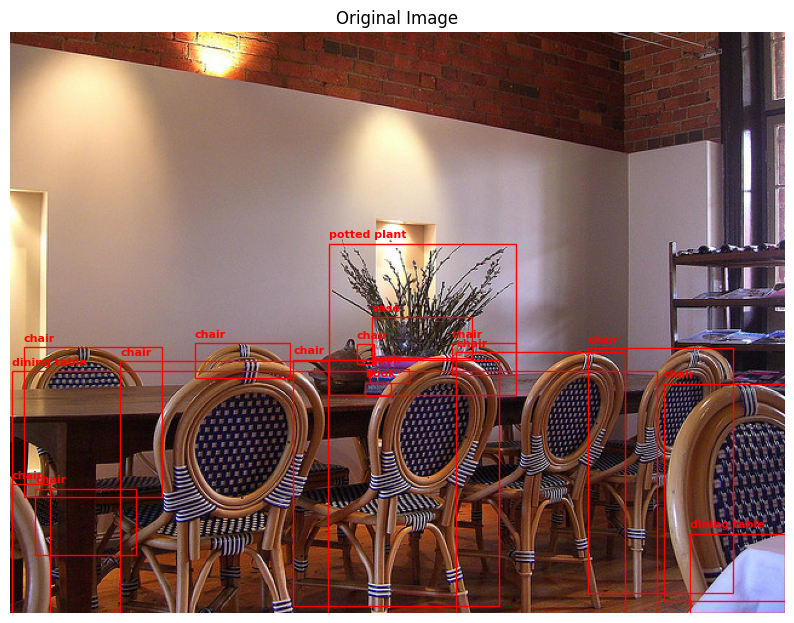

In [26]:
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

fig, ax = plt.subplots(figsize=(10,10), dpi=100)

ax.imshow(main_image)
ax.axis('off')
ax.set_title('Original Image')

for annotation in annotations:
    bbox = annotation['bbox']
    category_id = annotation['category_id']
    category_name = coco.loadCats(category_id)[0]['name']

    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height

    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    ax.text(xmin, ymin - 5, category_name, fontsize=8, color='red', weight='bold')

plt.savefig('bounding_boxes.png', bbox_inches='tight')

plt.show()

# Post-Processing Techniques

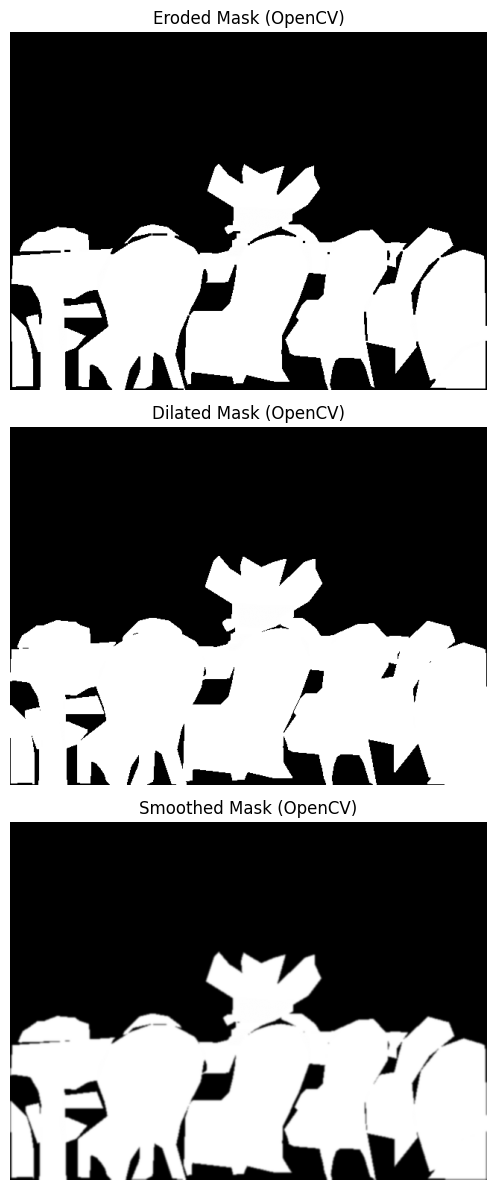

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mask_uint8 = (binary_mask * 255).astype(np.uint8)

kernel = np.ones((3,3), np.uint8)

eroded_mask = cv2.erode(mask_uint8, kernel, iterations=1)

dilated_mask = cv2.dilate(mask_uint8, kernel, iterations=1)

smoothed_mask = cv2.GaussianBlur(mask_uint8, (0, 0), sigmaX=1.0) 

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].imshow(eroded_mask, cmap='gray')
axes[0].set_title('Eroded Mask (OpenCV)')
axes[0].axis('off')

axes[1].imshow(dilated_mask, cmap='gray')
axes[1].set_title('Dilated Mask (OpenCV)')
axes[1].axis('off')

axes[2].imshow(smoothed_mask, cmap='gray')
axes[2].set_title('Smoothed Mask (OpenCV)')
axes[2].axis('off')

plt.tight_layout()
plt.savefig('post_processed_masks_cv2.png', dpi=300)
plt.show()

# Evaluation of Generated Masks

Intersection over Union (IoU)

In [28]:
import numpy as np

gt_mask = binary_mask.astype(bool)  

# Predicted mask
predicted_mask = smoothed_mask.astype(bool)

# Calculate Intersection over Union (IoU)
intersection = np.logical_and(gt_mask, predicted_mask)
union = np.logical_or(gt_mask, predicted_mask)
iou = np.sum(intersection) / np.sum(union)

# Print the IoU score
print(f"Intersection over Union (IoU): {iou:.4f}")

Intersection over Union (IoU): 0.9116


Visualization and Qualitative Assessment

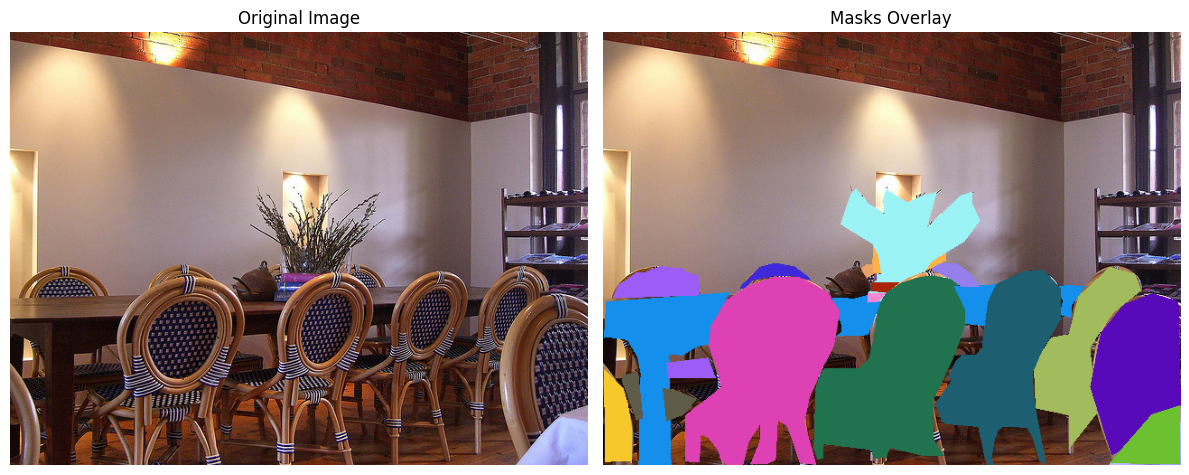

In [29]:
image_id = image_ids[0]

# Load the image
image_info = coco.loadImgs(image_id)[0]
image_path = os.path.join(imageDir, image_info['file_name'])
image = plt.imread(image_path)

# ground truth annotations for the image
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)

# a blank image for overlaying the masks
overlay = image.copy()

# Iterate over the annotations and draw the masks on the overlay image
for annotation in annotations:
    # Get the segmentation mask
    mask = coco.annToMask(annotation)
    
    # a random color for the mask
    color = np.random.randint(0, 256, size=(3,), dtype=np.uint8)
    
    # Apply the mask to the overlay image
    overlay[mask == 1] = color

# Create a figure and subplot for visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

# Plot the image with overlay masks
ax2.imshow(overlay)
ax2.set_title('Masks Overlay')
ax2.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the visualization as an image file
plt.savefig('mask_visualization.png', dpi=300)

# Show the plot
plt.show()

# Generating Image and Mask Datasets

In [30]:
!pip uninstall -y tensorflow-io
!pip install tensorflow-io

Found existing installation: tensorflow-io 0.37.1
Uninstalling tensorflow-io-0.37.1:
  Successfully uninstalled tensorflow-io-0.37.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 37.0 MB/s eta 0:00:00


In [31]:
import os
import numpy as np
from PIL import Image
from random import shuffle
from pycocotools.coco import COCO
from tensorflow import keras
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow warnings

ANNOTATION_FILE_TRAIN = '/kaggle/input/advanced-artificial-inteligence/annotations/instances_train2014.json'
ANNOTATION_FILE_VAL = '/kaggle/input/advanced-artificial-inteligence/annotations/instances_val2014.json'
TRAIN_IMAGES_DIR = '/kaggle/input/aai-course/train2014/train2014'
VAL_IMAGES_DIR = '/kaggle/input/aai-course/val2014/val2014'

# Define the object classes of interest
classes = ['person']

# Initialize COCO instances for training set
coco_train = COCO(ANNOTATION_FILE_TRAIN)
catIds_train = coco_train.getCatIds(catNms=classes)
imgIds_train = coco_train.getImgIds(catIds=catIds_train)

# Initialize COCO instances for validation set
coco_val = COCO(ANNOTATION_FILE_VAL)
catIds_val = coco_val.getCatIds(catNms=classes)
imgIds_val = coco_val.getImgIds(catIds=catIds_val)

print(f"Train images: {len(imgIds_train)}, Categories: {len(catIds_train)}")
print(f"Val images: {len(imgIds_val)}, Categories: {len(catIds_val)}")

# Shuffle image IDs
shuffle(imgIds_train)
shuffle(imgIds_val)

# Select subset
imgIds_val = imgIds_val[0:600]
imgIds_train = imgIds_train[0:6000]

# Check validation directory
if os.path.exists(VAL_IMAGES_DIR):
    print(f"Files in Val Dir: {len(os.listdir(VAL_IMAGES_DIR))}")
else:
    print("Warning: Validation directory not found!")

# Create directories to store masks
os.makedirs('mask_train_2014', exist_ok=True)
os.makedirs('mask_val_2014', exist_ok=True)

# --- GENERATE TRAINING MASKS ---
print("Generating Training Masks...")
count = 0 
for ID in imgIds_train:
    file_path = "/kaggle/working/mask_train_2014/COCO_train2014_{0:012d}.jpg".format(ID)
    
    # Get annotations
    annIds = coco_train.getAnnIds(imgIds=ID, catIds=catIds_train, iscrowd=0)
    anns = coco_train.loadAnns(annIds)

    if not anns:
        continue

    # Generate mask
    mask = coco_train.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_train.annToMask(anns[i])

    # ✅ FIXED: Remove deprecated 'mode' parameter
    mask = Image.fromarray(mask * 255)  # Removed mode="L"
    mask.save(file_path)
    count += 1
    if count % 1000 == 0:
        print(f"Processed {count} training masks")

# --- GENERATE VALIDATION MASKS ---
print("Generating Validation Masks...")
count = 0
for ID in imgIds_val:
    file_path = "/kaggle/working/mask_val_2014/COCO_val2014_{0:012d}.jpg".format(ID)

    annIds = coco_val.getAnnIds(imgIds=ID, catIds=catIds_val, iscrowd=0)
    anns = coco_val.loadAnns(annIds)

    if not anns:
        continue

    mask = coco_val.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_val.annToMask(anns[i])

    mask = Image.fromarray(mask * 255) 
    mask.save(file_path)
    count += 1
    if count % 100 == 0:
        print(f"Processed {count} validation masks")

# --- CUSTOM DATA GENERATOR ---
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        # Find files that exist in both directories
        if not os.path.exists(self.images_path) or not os.path.exists(self.masks_path):
            return []
            
        image_files = set([os.path.splitext(f)[0] for f in os.listdir(self.images_path) if f.endswith('.jpg')])
        mask_files = set([os.path.splitext(f)[0] for f in os.listdir(self.masks_path) if f.endswith('.jpg')])
        return list(image_files.intersection(mask_files))

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, filename + '.jpg')

            try:
                image = Image.open(image_path).convert('RGB')
                mask = Image.open(mask_path).convert('L')

                if image.size != mask.size:
                    image = image.resize(mask.size)

                image = image.resize((128, 128))
                mask = mask.resize((128, 128))

                img_arr = np.array(image) / 255.0
                mask_arr = np.array(mask) / 255.0

                if len(img_arr.shape) == 3:
                    batch_images.append(img_arr)
                    batch_masks.append(mask_arr)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
                continue
        
        return np.array(batch_images), np.array(batch_masks)

# Usage
train_images_path = TRAIN_IMAGES_DIR
masks_path = '/kaggle/working/mask_train_2014'
batch_size = 8

train_generator = CustomDataGenerator(train_images_path, masks_path, batch_size)
print(f"Generator created with {len(train_generator)} batches")

2026-01-06 14:25:27.961623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767709528.148301      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767709528.200245      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767709528.652911      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767709528.652943      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767709528.652945      24 computation_placer.cc:177] computation placer alr

loading annotations into memory...
Done (t=8.32s)
creating index...
index created!
loading annotations into memory...
Done (t=4.99s)
creating index...
index created!
Train images: 45174, Categories: 1
Val images: 21634, Categories: 1
Files in Val Dir: 40504
Generating Training Masks...
Processed 1000 training masks
Processed 2000 training masks
Processed 3000 training masks
Processed 4000 training masks
Processed 5000 training masks
Processed 6000 training masks
Generating Validation Masks...
Processed 100 validation masks
Processed 200 validation masks
Processed 300 validation masks
Processed 400 validation masks
Processed 500 validation masks
Processed 600 validation masks
Generator created with 750 batches


In [32]:
def validate_image_shapes(generator):
    for i in range(len(generator)):
        batch_images, _ = generator[i]
        
        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")
            
validate_image_shapes(train_generator)

Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of pr

In [33]:
print(len(os.listdir("/kaggle/input/aai-course/train2014/train2014")))

print(len(os.listdir("/kaggle/working/mask_train_2014")))

print(len(os.listdir("/kaggle/input/aai-course/val2014/val2014")))

print(len(os.listdir("/kaggle/working/mask_val_2014")))

82783
6000
40504
600


Mask Image Shape: (480, 640)
Main Image Shape: (480, 640, 3)


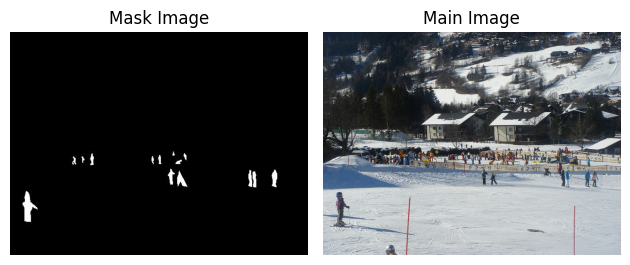

In [34]:
images_path = TRAIN_IMAGES_DIR 

mask_filenames = [filename for filename in os.listdir(masks_path) if filename.endswith('.jpg')]
first_mask_filename = mask_filenames[0]
image_filename = os.path.splitext(first_mask_filename)[0] + '.jpg'

mask_image = Image.open(os.path.join(masks_path, first_mask_filename))
plt.subplot(1, 2, 1)
plt.imshow(mask_image, cmap='gray')
plt.title('Mask Image')
plt.axis('off')

main_image = Image.open(os.path.join(images_path, image_filename))
plt.subplot(1, 2, 2)
plt.imshow(main_image)
plt.title('Main Image')
plt.axis('off')

print('Mask Image Shape:', np.array(mask_image).shape)
print('Main Image Shape:', np.array(main_image).shape)

plt.tight_layout()
plt.show()

# Training a U-Net Model for Image Segmentation

U-Net Model

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import keras
from keras.layers import *
from keras.optimizers import *

def down_block(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)
    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)
    conv = Activation("relu")(conv)  # conv for skip connection

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool

def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)
    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)
    conv = Activation("relu")(conv)

    return conv

def up_block(    
    input_tensor,
    no_filters,
    skip_connection, 
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):
    
    conv = Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size = upsampling_factor)(input_tensor))
    
    conv = BatchNormalization(scale=True)(conv)
    conv = Activation("relu")(conv) 
    
    conv = concatenate( [skip_connection , conv]  , axis = -1)
    
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)
    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)
    conv = Activation("relu")(conv)
    
    return conv

def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal"):
    
    conv = Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)
    
    conv = Conv2D(
        filters=1,
        kernel_size=(1,1),
        strides=(1,1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)
    
    return conv

def UNet(input_shape = (128,128,3)):
    
    filter_size = [64,128,256,512,1024]
    inputs = Input(shape = input_shape)
    
    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    d4 , p4 = down_block(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    b = bottle_neck(input_tensor= p4,
                    no_filters=filter_size[4],
                    kernel_size = (3,3),
                    strides=(1,1),
                    padding="same",
                    kernel_initializer="he_normal")
    
    u4 = up_block(input_tensor = b,
                  no_filters = filter_size[3],
                  skip_connection = d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    u3 = up_block(input_tensor = u4,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    output = output_block(input_tensor=u1 , 
                         padding = "same",
                         kernel_initializer= "he_normal")
    
    model = keras.models.Model(inputs = inputs , outputs = output)
    return model

# Create and compile the model
model = UNet(input_shape = (128,128,3))

model.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

# Print model summary
model.summary()

I0000 00:00:1767709679.165125      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1767709679.165847      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,060,229 (118.49 MB)

 Trainable params: 31,046,533 (118.43 MB)

 Non-trainable params: 13,696 (53.50 KB)

In [36]:
images_path = '/kaggle/input/aai-course/val2014/val2014'
masks_path = '/kaggle/working/mask_val_2014'
batch_size = 8

val_generator = CustomDataGenerator(images_path, masks_path, batch_size)

In [37]:
def print_preprocessed_image_shapes(model, generator):
    for i in range(len(generator)):
        batch_images, batch_mask = generator[i]

        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")
            
            
# Print the shapes of preprocessed images
print_preprocessed_image_shapes(model, val_generator)

Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of pr

In [38]:
import sys

print("Python version:", sys.version)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


Fit the model with the training generator

Checking masks...
✅ Masks ready.
Train batches: 750 | Steps: 750
Val batches: 75 | Steps: 75

🚀 Starting Training...
Epoch 1/20


I0000 00:00:1767709709.275790      97 service.cc:152] XLA service 0x7d122c05bff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767709709.275838      97 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1767709709.275844      97 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1767709711.674378      97 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-06 14:28:39.561267: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 14:28:39.852803: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 14:28:40.895994: E external/local_xl

750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7904 - loss: 0.4145
Epoch 1: val_accuracy improved from -inf to 0.82559, saving model to unet_person_segmentation.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 189s 186ms/step - accuracy: 0.7905 - loss: 0.4145 - val_accuracy: 0.8256 - val_loss: 0.3895 - learning_rate: 1.0000e-04
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.8431 - loss: 0.2986
Epoch 2: val_accuracy improved from 0.82559 to 0.86216, saving model to unet_person_segmentation.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 141s 188ms/step - accuracy: 0.8432 - loss: 0.2986 - val_accuracy: 0.8622 - val_loss: 0.2699 - learning_rate: 1.0000e-04
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.8586 - loss: 0.2683
Epoch 3: val_accuracy did not improve from 0.86216
750/750 ━━━━━━━━━━━━━━━━━━━━ 140s 186ms/step - accuracy: 0.8586 - loss: 0.2682 - val_accuracy: 0.8586 - val_loss: 0.2794 - learning_rate: 1.0000e-04
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 178

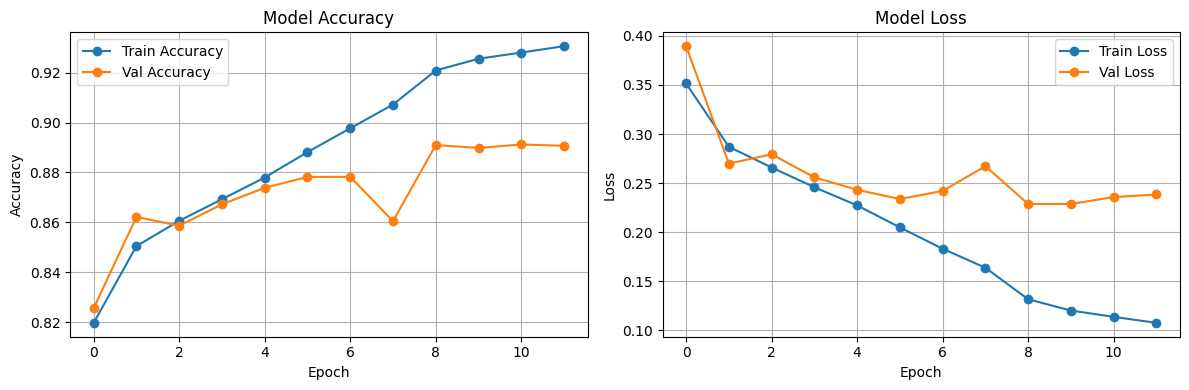


✅ Done! Best Val Acc: 0.8912


In [39]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

import numpy as np
from PIL import Image
from random import shuffle
from pycocotools.coco import COCO
import tensorflow as tf
from tensorflow import keras
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

BATCH_SIZE = 8
ANNOTATION_FILE_TRAIN = '/kaggle/input/advanced-artificial-inteligence/annotations/instances_train2014.json'
ANNOTATION_FILE_VAL = '/kaggle/input/advanced-artificial-inteligence/annotations/instances_val2014.json'
TRAIN_IMAGES_DIR = '/kaggle/input/aai-course/train2014/train2014'
VAL_IMAGES_DIR = '/kaggle/input/aai-course/val2014/val2014'
MASK_TRAIN_DIR = '/kaggle/working/mask_train_2014'
MASK_VAL_DIR = '/kaggle/working/mask_val_2014'

# --- 1. MASK GENERATION
def generate_masks_if_needed():
    os.makedirs(MASK_TRAIN_DIR, exist_ok=True)
    os.makedirs(MASK_VAL_DIR, exist_ok=True)
    
    existing_train = len(os.listdir(MASK_TRAIN_DIR))
    if existing_train < 100:  
        print(f"⚠️ Only found {existing_train} masks. Generating training masks...")
        coco = COCO(ANNOTATION_FILE_TRAIN)
        catIds = coco.getCatIds(catNms=['person'])
        imgIds = coco.getImgIds(catIds=catIds)
        shuffle(imgIds)
        subset_ids = imgIds[:6000]
        
        for i, ID in enumerate(subset_ids):
            file_path = f"{MASK_TRAIN_DIR}/COCO_train2014_{ID:012d}.jpg"
            if os.path.exists(file_path): continue
            
            annIds = coco.getAnnIds(imgIds=ID, catIds=catIds, iscrowd=0)
            anns = coco.loadAnns(annIds)
            if not anns: continue
            
            mask = coco.annToMask(anns[0])
            for j in range(len(anns)): mask |= coco.annToMask(anns[j])
            
            Image.fromarray(mask * 255).save(file_path)
            if i % 1000 == 0: print(f"Generated {i} training masks...")

    existing_val = len(os.listdir(MASK_VAL_DIR))
    if existing_val < 100:
        print(f"⚠️ Only found {existing_val} masks. Generating validation masks...")
        coco_val = COCO(ANNOTATION_FILE_VAL)
        catIds_val = coco_val.getCatIds(catNms=['person'])
        imgIds_val = coco_val.getImgIds(catIds=catIds_val)
        shuffle(imgIds_val)
        subset_ids_val = imgIds_val[:600]
        
        for i, ID in enumerate(subset_ids_val):
            file_path = f"{MASK_VAL_DIR}/COCO_val2014_{ID:012d}.jpg"
            if os.path.exists(file_path): continue
            
            annIds = coco_val.getAnnIds(imgIds=ID, catIds=catIds_val, iscrowd=0)
            anns = coco_val.loadAnns(annIds)
            if not anns: continue
            
            mask = coco_val.annToMask(anns[0])
            for j in range(len(anns)): mask |= coco_val.annToMask(anns[j])
            
            Image.fromarray(mask * 255).save(file_path)

print("Checking masks...")
generate_masks_if_needed()
print("✅ Masks ready.")

# --- 2. DATA GENERATOR ---
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size, **kwargs):
        super().__init__(**kwargs)
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        if not os.path.exists(self.images_path) or not os.path.exists(self.masks_path):
            return []
        image_files = set([os.path.splitext(f)[0] for f in os.listdir(self.images_path) if f.endswith('.jpg')])
        mask_files = set([os.path.splitext(f)[0] for f in os.listdir(self.masks_path) if f.endswith('.jpg')])
        return list(image_files.intersection(mask_files))

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, filename + '.jpg')

            try:
                image = Image.open(image_path).convert('RGB')
                mask = Image.open(mask_path).convert('L')

                image = image.resize((128, 128))
                mask = mask.resize((128, 128))

                img_arr = np.array(image) / 255.0
                mask_arr = np.array(mask) / 255.0

                if len(img_arr.shape) == 3:
                    batch_images.append(img_arr)
                    batch_masks.append(mask_arr)
            except Exception as e:
                continue
        
        return np.array(batch_images), np.array(batch_masks)

# --- 3. TRAINING SETUP ---
train_generator = CustomDataGenerator(TRAIN_IMAGES_DIR, MASK_TRAIN_DIR, BATCH_SIZE)
val_generator = CustomDataGenerator(VAL_IMAGES_DIR, MASK_VAL_DIR, BATCH_SIZE)

train_steps = len(os.listdir(MASK_TRAIN_DIR)) // BATCH_SIZE
val_steps = len(os.listdir(MASK_VAL_DIR)) // BATCH_SIZE

print(f"Train batches: {len(train_generator)} | Steps: {train_steps}")
print(f"Val batches: {len(val_generator)} | Steps: {val_steps}")

# Callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'unet_person_segmentation.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=2,
        verbose=1
    )
]

if 'model' in locals():
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    print("\n🚀 Starting Training...")
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        steps_per_epoch=train_steps,
        validation_steps=val_steps,
        epochs=20,
        callbacks=callbacks,
        verbose=1
    )

    # --- 4. VISUALIZATION ---
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ Done! Best Val Acc: {max(history.history['val_accuracy']):.4f}")
else:
    print("❌ Error: 'model' is not defined. Please run the UNet model definition cell first!")

# Predicting and Visualizing Segmentation Masks

Loading test samples...
Predicting masks...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


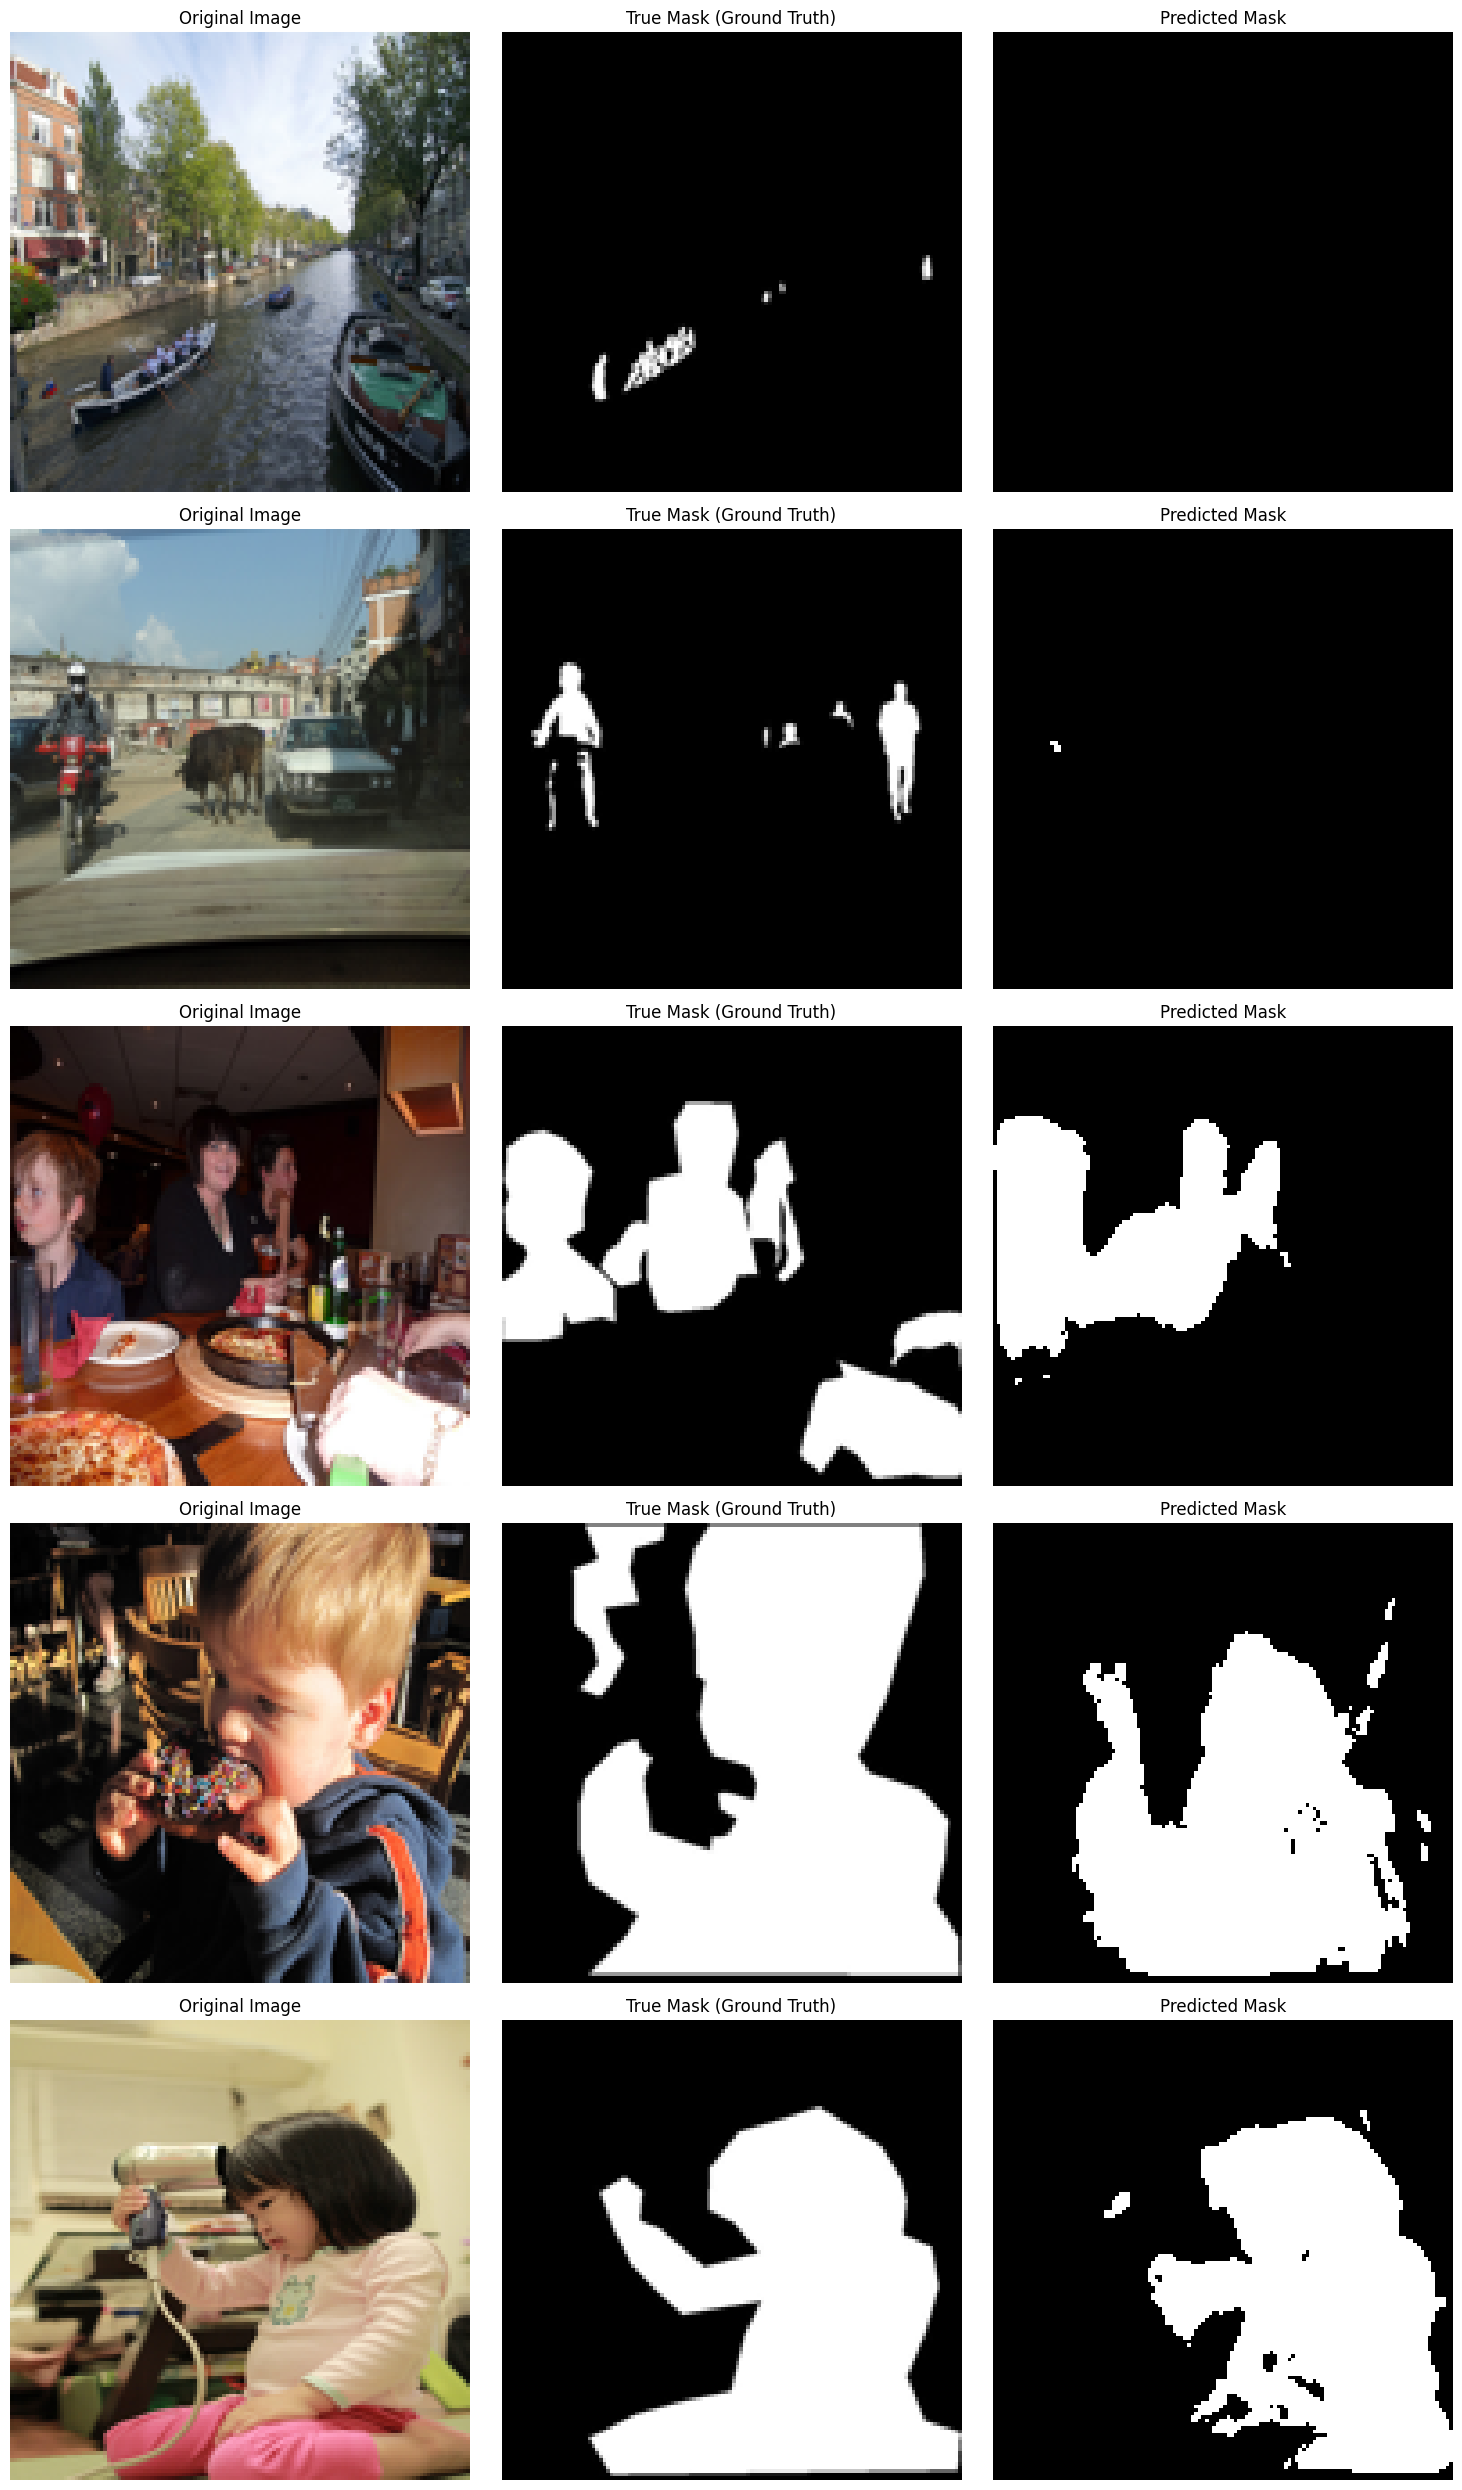

In [40]:
print("Loading test samples...")
test_images, test_masks = val_generator[0] 

print("Predicting masks...")
predictions = model.predict(test_images)

import matplotlib.pyplot as plt

def plot_predictions(images, true_masks, pred_masks, num_samples=3):
    plt.figure(figsize=(15, 5*num_samples))
    
    for i in range(num_samples):
        # Original Image
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(images[i])
        plt.title('Original Image')
        plt.axis('off')
        
        # Ground Truth Mask
        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(true_masks[i], cmap='gray')
        plt.title('True Mask (Ground Truth)')
        plt.axis('off')
        
        plt.subplot(num_samples, 3, i*3 + 3)
        pred_mask = (pred_masks[i] > 0.5).astype(np.float32)
        plt.imshow(pred_mask[:, :, 0], cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

# Show 5 examples
plot_predictions(test_images, test_masks, predictions, num_samples=5)

# Calculate Mean IoU Score

In [41]:
from tensorflow.keras.metrics import MeanIoU

print("Calculating IoU Score...")
# Get predictions for a batch
images, masks = val_generator[0]
preds = model.predict(images)

# Threshold predictions (convert to 0 or 1)
preds_thresholded = (preds > 0.5).astype(np.int32)
masks_int = masks.astype(np.int32)

# Flatten arrays for IoU calculation
preds_flat = preds_thresholded.flatten()
masks_flat = masks_int.flatten()

# Calculate IoU
iou = MeanIoU(num_classes=2)
iou.update_state(masks_flat, preds_flat)
print(f"Mean IoU Score: {iou.result().numpy():.4f}")

Calculating IoU Score...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Mean IoU Score: 0.7466


# Test on Custom Images (Internet URL)

2026-01-06 14:57:23.781773: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 14:57:23.982094: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


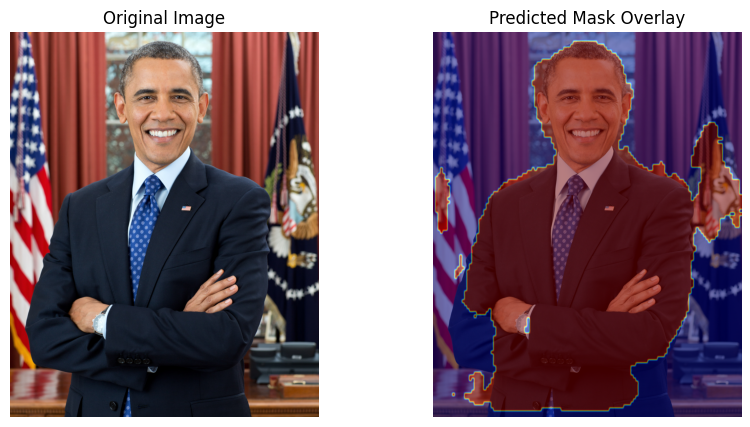

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


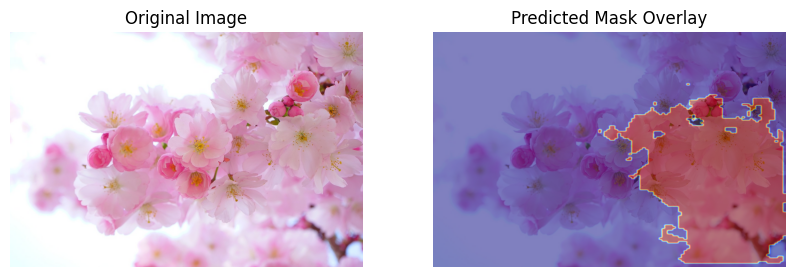

In [42]:
import requests
from io import BytesIO

def predict_custom_image(url):
    try:
        # ✅ Add Headers to mimic a browser
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
        
        # Load image with headers
        response = requests.get(url, headers=headers, stream=True)
        response.raise_for_status() # Check for HTTP errors
        
        img = Image.open(BytesIO(response.content)).convert('RGB')
        
        # Save original size
        w, h = img.size
        
        # Resize to model input size (128x128)
        img_resized = img.resize((128, 128))
        img_array = np.array(img_resized) / 255.0
        img_batch = np.expand_dims(img_array, axis=0)
        
        # Predict
        prediction = model.predict(img_batch)[0]
        mask = (prediction > 0.5).astype(np.uint8)
        
        # Resize mask back to original size
        mask_img = Image.fromarray(mask[:,:,0] * 255)
        mask_resized = mask_img.resize((w, h))
        
        # Visualization
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(img)
        plt.imshow(mask_resized, alpha=0.5, cmap='jet') # Overlay mask
        plt.title("Predicted Mask Overlay")
        plt.axis('off')
        
        plt.show()
        
    except Exception as e:
        print(f"Error loading {url}: {e}")

# Try these reliable URLS
urls = [
    "https://upload.wikimedia.org/wikipedia/commons/8/8d/President_Barack_Obama.jpg",
    "https://cdn.pixabay.com/photo/2014/04/14/20/11/pink-324175_1280.jpg"
]

for url in urls:
    predict_custom_image(url)